Import Modul

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Scraping 1 halaman

In [ ]:
url = "https://books.toscrape.com/catalogue/page-1.html"
res = requests.get(url)
res.encoding = "utf-8"  # Penting untuk menghindari error karakter!
soup = BeautifulSoup(res.text, "html.parser")

In [8]:
book_data = []

In [10]:
books = soup.select("article.product_pod")

In [11]:
for book in books:
    title = book.h3.a["title"]
    price = book.select_one("p.price_color").text
    availability = book.select_one("p.instock.availability").text.strip()
    book_data.append({
        "title": title,
        "price": price,
        "availability": availability
    })

Step 2: Cleansing

In [ ]:
df = pd.DataFrame(book_data)

# Hilangkan karakter selain angka dan titik dari kolom harga
df["price"] = df["price"].apply(lambda x: re.sub(r"[^\d.]", "", x)).astype(float)

# Bersihkan kolom availability
df["availability"] = df["availability"].str.lower().str.replace("\n", "").str.strip()

In [15]:
print(df.to_string(index=False))

                                                                                         title  price availability
                                                                          A Light in the Attic  51.77     in stock
                                                                            Tipping the Velvet  53.74     in stock
                                                                                    Soumission  50.10     in stock
                                                                                 Sharp Objects  47.82     in stock
                                                         Sapiens: A Brief History of Humankind  54.23     in stock
                                                                               The Requiem Red  22.65     in stock
                                            The Dirty Little Secrets of Getting Your Dream Job  33.34     in stock
       The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Vic

Step 3: Simpan ke Excel

In [16]:
df.to_excel("books_page1.xlsx", index=False)

Step 4: Visualisasi

In [17]:
# Set style
sns.set(style="whitegrid")

C:\Users\user\AppData\Local\Temp\ipykernel_8012\1527639892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="availability", data=df, palette="Set2")


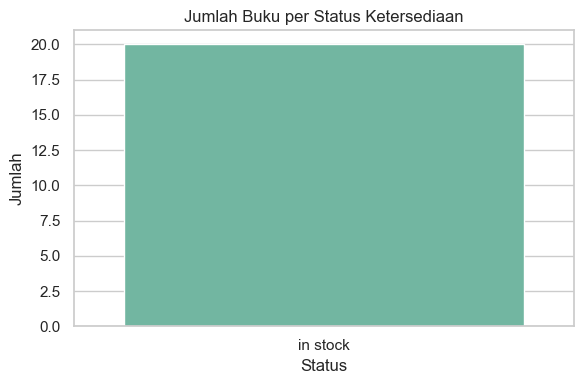

In [18]:
# a. Grafik Jumlah Ketersediaan
plt.figure(figsize=(6, 4))
sns.countplot(x="availability", data=df, palette="Set2")
plt.title("Jumlah Buku per Status Ketersediaan")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.savefig("availability_page1.png")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8012\3307376241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="title", data=top5, palette="coolwarm")


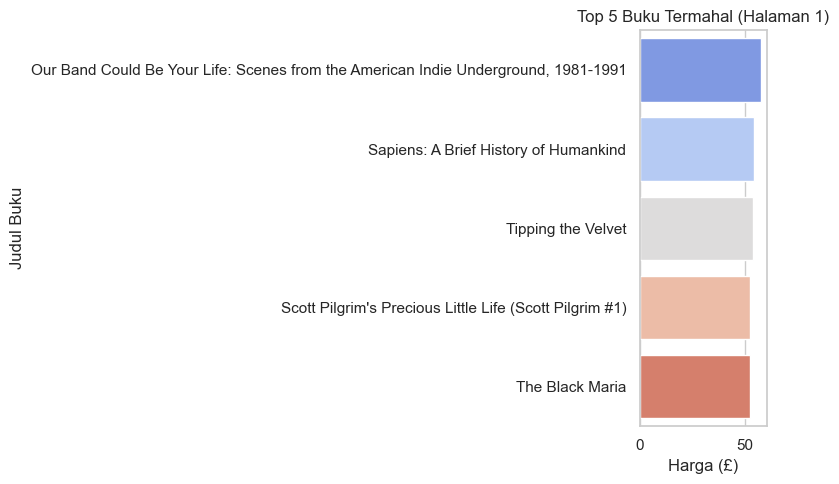

In [19]:
# b. Grafik 5 Buku dengan Harga Tertinggi
top5 = df.sort_values("price", ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x="price", y="title", data=top5, palette="coolwarm")
plt.title("Top 5 Buku Termahal (Halaman 1)")
plt.xlabel("Harga (£)")
plt.ylabel("Judul Buku")
plt.tight_layout()
plt.savefig("top5_prices_page1.png")
plt.show()